### Proteins from `Multisteric Regulation by Structural Disorder in Modular Signaling Proteins: An Extension of the Concept of Allostery` Tompa - chemrev2014

In [59]:
#!pip install matplotlib-venn

In [64]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [4]:
df = pd.read_csv('../raw_data/tompa_chemrev2014.tsv', sep = '\t')

In [5]:
df.columns

Index(['protein, functional class (UniProt ID)', 'term in the literature',
       'input signal', 'output', 'distance', 'disorder (expt)',
       'disorder (% VSL2)', 'activation', 'ref'],
      dtype='object')

In [6]:
df

,"protein, functional class (UniProt ID)",term in the literature,input signal,output,distance,disorder (expt),disorder (% VSL2),activation,ref
0,"DnaK (Hsp70, P0A6Y8)",(interdomain) allostery,ATP binding,client binding,"7 (ATP-binding domain, client-binding domain)",yes,50.0,D → O,13
1,"Hck, Tyr kinase (P08631)",autoinhibited,dePh,kinase activity,SH2–kinaseD: 22,yes,95.5,O → D,26
2,"Ets-1, transcription factor (P14921)",allosteric,multiple phosphorylation,DNA binding,Ser251–helix1: 50,yes,100.0,D → D,99
3,"p53, transcription factor (P04637)",allosteric,"Ph, Ac",DNA binding,DBD–regulatoryD: 77,yes,100.0,D → D,"115, 116"
4,"Vav, cytoskeleton (P15498)",autoinhibited,phosphorylation,Rho binding,helix–DH-D: 10,yes,100.0,O → D,106
5,"WASP, cytoskeleton (P42768)",allosteric,"Cdc42, PIP2, Ph",Arp2/3 binding,CRIB–WH2: 179,yes,78.3,O → D,98
6,"p27Kip1, cell cycle (Q9NYG6)",signaling conduit,phosphorylation,"Ph, degr.",Tyr88–Thr187: 99,yes,100.0,D → D,"109, 117"
7,"Smurf2, E3 ligase (Q9HAU4)",autoinhibited,SMAD7 binding,E2 binding,C2–HECT: 316,yes,53.2,O → D,105
8,"importin-α, transport receptor (P52293)",intrasteric,importin β binding,NLS binding,IARS–receptorD: 18,no,100.0,O → D,118
9,"CFTR, transmembrane channel (P13569)",none,multiple phosphorylation,nucleotide binding,NBD1–Ser813: 161,yes,95.0,D → D,111


In [49]:
# Regex for extracting uniprot accession (https://www.biostars.org/p/13753/)
df['uniprot_acc'] = df['protein, functional class (UniProt ID)'].apply(lambda x: re.findall('[OPQ][0-9][A-Z0-9][A-Z0-9][A-Z0-9][0-9]', x)).apply(lambda x: x[0])
df['uniprot_acc']

0     P0A6Y8
1     P08631
2     P14921
3     P04637
4     P15498
5     P42768
6     Q9NYG6
7     Q9HAU4
8     P52293
9     P13569
10    P38634
11    Q06253
12    Q08209
13    Q00987
14    Q12959
15    P04637
16    P83949
Name: uniprot_acc, dtype: object

### Check overlap with Gospner (2016)

In [54]:
cre = pd.read_csv('../datasets/cre_dataset.csv')

In [61]:
overlap = cre[cre.uniprot_acc.isin(df.uniprot_acc)] # only 5 proteins
overlap

,name,uniprot_acc,species,references,module,start_aa,end_aa,dataset
5,Vav1,P15498,H. sapiens,"(Barreira et al., 2014; Rapley et al., 2008; T...",d,131,178,train
20,WASP,P42768,H. sapiens,"(Kim et al., 2000; Padrick and Rosen, 2010; Tr...",d,210,"227, 483",train
25,Importin α P1,P52293,M. musculus,"(Catimel et al., 2001; Trudeau et al., 2013)",d,1,70,train
123,p53,P04637,H. sapiens,"(Ko and Prives, 1996; Trudeau et al., 2013)",d,364,393,test
140,Smurf2,Q9HAU4,H. sapiens,"(Lu et al., 2011)",s,14,98,test


In [79]:
cre.uniprot_acc.nunique()

151

In [80]:
ov = overlap.uniprot_acc.nunique()
a_cre = cre.uniprot_acc.nunique() - ov
b_multisteric = df.uniprot_acc.nunique() - ov

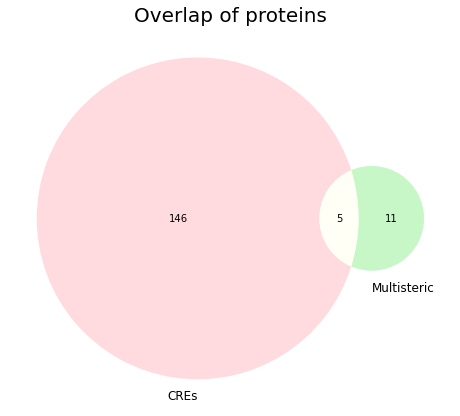

In [81]:
plt.figure(figsize=(8,8))
venn2(
    subsets=(a_cre, b_multisteric, ov),
    set_labels= ('CREs', 'Multisteric'),
    alpha = 0.5,
    set_colors= ('lightpink', 'lightgreen')
)

plt.title("Overlap of proteins", fontsize= 20)
plt.show()